# Day 3 Ad. Sale Prediction from Existing customer - Logistic Regression

### *Importing Libraries*

In [ ]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array

### *Choose Dataset file from Local Directory*

In [ ]:
from google.colab import files
uploaded = files.upload()

### *Load Dataset*

In [ ]:
dataset = pd.read_csv('ad_dataset.csv')

### *Summarize Dataset*

In [ ]:
print(dataset.shape)
print(dataset.head(5))

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [ ]:
X = dataset.iloc[:, :-1].values
X

In [ ]:
Y = dataset.iloc[:, -1].values
Y

### *Splitting Dataset into Train & Test*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

### *Training*

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

### *Predicting, wheather new customer with Age & Salary will Buy or Not*

In [ ]:
age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newCust = [[age,sal]]
result = model.predict(sc.transform(newCust))
print(result)
if result == 1:
  print("Customer will Buy")
else:
  print("Customer won't Buy")

### *Prediction for all Test Data*

In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### *Evaluating Model - CONFUSION MATRIX*
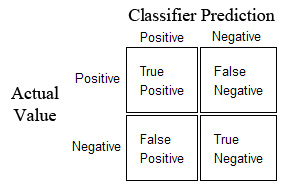

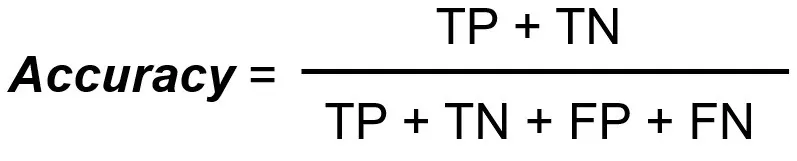

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))